# https://tinyurl.com/2p82uuvz

In [1]:
quake_dicts = [{'place': 'southeast of the Loyalty Islands',
  'time': 1637538745422,
  'mag': 4.5,
  'loc': {'lat': -22.7976, 'lon': 171.963}},
 {'place': '5km ESE of Walker, CA',
  'time': 1637537593330,
  'mag': 1.19,
  'loc': {'lat': 38.504, 'lon': -119.429}},
 {'place': '19 km W of Cheyenne Wells, Colorado',
  'time': 1637537565440,
  'mag': 1.9,
  'loc': {'lat': 38.8551, 'lon': -102.5692}},
 {'place': '4 km NW of Point MacKenzie, Alaska',
  'time': 1637537529410,
  'mag': 1.7,
  'loc': {'lat': 61.3898, 'lon': -150.0462}},
 {'place': '15 km SE of Waynoka, Oklahoma',
  'time': 1637537486109,
  'mag': 1.51,
  'loc': {'lat': 36.473, 'lon': -98.7745}}]

def place_miles(quake):
    place = quake["place"]
    km_idx = place.find("km")
    if km_idx < 0:
        return place
    num = place[:km_idx].strip()
    if not num.isdigit():
        return place
    miles = round(float(num) * 0.621371, 2)
    return f"{miles} miles{place[km_idx+2:]}"

place_miles(quake_dicts[4])


'9.32 miles SE of Waynoka, Oklahoma'

In [2]:
import math

class Location:
    def __init__(self, lat, lon):
        self.lat = lat
        self.lon = lon
        
    def __str__(self): # for non-programmers
        return f"Location: lat={self.lat}, lon={self.lon}"
        
    def __repr__(self): # for programmers
        return f"Location({self.lat}, {self.lon})"
    
    def __eq__(self, other):
        #return self.lat == other.lat and self.lon == other.lon
        return math.isclose(self.lat, other.lat) and math.isclose(self.lon, other.lon)
#         if self.lat == other.lat and self.lon == other.lon:
#             return True
#         else:
#             return False

class Earthquake:
    def __init__(self, values):
        self.place = values["place"]
        self.time = values["time"]
        self.mag = values["mag"]
        self.loc = Location(values["loc"]["lat"], values["loc"]["lon"])
        
    def _repr_html_(self):
        size = max(5 - int(self.mag), 1)
        return f"<h{size}>Mag {self.mag} earthquake at {self.place}</h{size}>"
    
    def __repr__(self):
        return f"Mag {self.mag} earthquake at {self.place}"

    # less than
    def __lt__(self, other):
        return self.mag < other.mag

In [3]:
# earthquakes = []
# for q in quake_dicts:
#     earthquakes.append(Earthquake(q))

earthquakes = [Earthquake(q) for q in quake_dicts]
earthquakes

[Mag 4.5 earthquake at southeast of the Loyalty Islands,
 Mag 1.19 earthquake at 5km ESE of Walker, CA,
 Mag 1.9 earthquake at 19 km W of Cheyenne Wells, Colorado,
 Mag 1.7 earthquake at 4 km NW of Point MacKenzie, Alaska,
 Mag 1.51 earthquake at 15 km SE of Waynoka, Oklahoma]

In [4]:
earthquakes[0] < earthquakes[1] # calls earthquakes[0].__lt__(earthquakes[1])

False

In [5]:
new_list = sorted(earthquakes) # makes a new list
# earthquakes.sort() -- modifies existing list (shuffle items around)
new_list

[Mag 1.19 earthquake at 5km ESE of Walker, CA,
 Mag 1.51 earthquake at 15 km SE of Waynoka, Oklahoma,
 Mag 1.7 earthquake at 4 km NW of Point MacKenzie, Alaska,
 Mag 1.9 earthquake at 19 km W of Cheyenne Wells, Colorado,
 Mag 4.5 earthquake at southeast of the Loyalty Islands]

In [6]:
Earthquake(quake_dicts[1])

Mag 1.19 earthquake at 5km ESE of Walker, CA

In [7]:
Earthquake(quake_dicts[4])

Mag 1.51 earthquake at 15 km SE of Waynoka, Oklahoma

In [8]:
Earthquake(quake_dicts[0])

Mag 4.5 earthquake at southeast of the Loyalty Islands

In [9]:
point1 = Location(36.473, -98.7745)
print(point1)   # calls str(obj), which calls obj.__str__()
point1          # calls repr(obj), which calls obj.__repr__()

Location: lat=36.473, lon=-98.7745


Location(36.473, -98.7745)

In [10]:
point2 = Location(36.473, -98.7745000001)
point2

Location(36.473, -98.7745000001)

In [11]:
point1 == point2 # calls point1.__eq__(point2)

True

In [12]:
import pandas as pd
pd.DataFrame([[1,2], [3,4]])

,0,1
0,1,2
1,3,4


In [13]:
pd.DataFrame([[1,2], [3,4]])._repr_html_()

'<div>\n<style scoped>\n    .dataframe tbody tr th:only-of-type {\n        vertical-align: middle;\n    }\n\n    .dataframe tbody tr th {\n        vertical-align: top;\n    }\n\n    .dataframe thead th {\n        text-align: right;\n    }\n</style>\n<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n      <th>1</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1</td>\n      <td>2</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>3</td>\n      <td>4</td>\n    </tr>\n  </tbody>\n</table>\n</div>'

In [14]:
s = "AB\nC"
print(s)
s

AB
C


'AB\nC'

# Range example

In [15]:
range(5)

range(0, 5)

In [57]:
class Range:
    def __init__(self, v1, v2=None):
        if v2 == None:
            self.lower = 0
            self.upper = v1
        else:
            self.lower = v1
            self.upper = v2
            
    def __getitem__(self, lookup):
        #print("LOOKUP", lookup)
        if not isinstance(lookup, int):
            raise NotImplementedError("only int indexing supported")
        if lookup < 0:
            raise NotImplementedError("neg idx not supported")
        if lookup >= (self.upper-self.lower):
            raise IndexError()
        return self.lower + lookup
    
    def __len__(self):
        return self.upper-self.lower

r = Range(3, 8)
r

In [58]:
len(r)

5

In [52]:
# r[1] => r.__getitem__(1)
r[1]  # subscriptable => brackets are usable

4

In [53]:
# r["2:4"] -- not supported yet

In [54]:
for x in r:
    print(x)

3
4
5
6
7


In [55]:
list(r)

[3, 4, 5, 6, 7]

In [59]:
len(r) # len(r) calls r.__len__() calls Range.__len__(r)

5

# with statement

In [62]:
f = open("test.txt", "w")
f.write("hello")
# what if we crash here?
assert 1 == 2
f.write("world")
f.close()

AssertionError: 

In [63]:
# with (instead of Java's finally)

with open("test.txt", "w") as f:
    f.write("hello")
    assert 1 == 2
    f.write("world")

# f.close()  -- happens automatically

AssertionError: 

In [65]:
class Example:
    def __init__(self):
        print("create object")
        
    def __enter__(self):
        print("start with block")

    def __exit__(self, exc_type, exc_value, traceback):
        print("exit with block")
        

with Example() as obj:
    print("A")
    assert 1 == 2
    print("B")

create object
start with block
A
exit with block


AssertionError: 

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

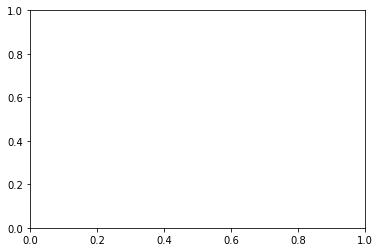

In [69]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 10
plt.subplots()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

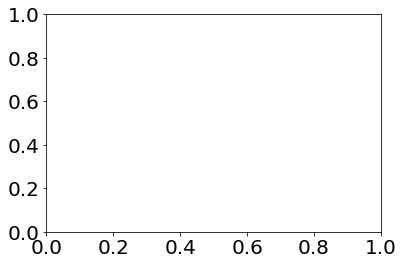

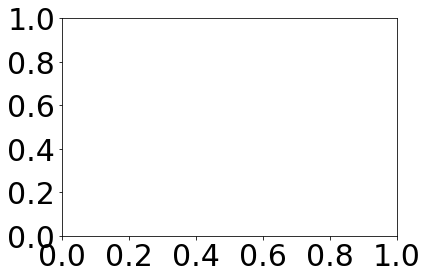

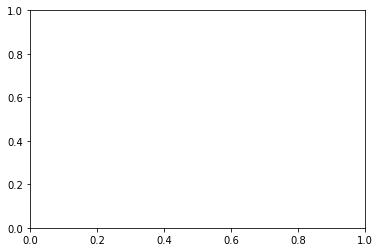

In [79]:
class MultFont:
    def __init__(self, mult=2):
        self.mult = mult
    
    def __enter__(self):
        plt.rcParams["font.size"] *= self.mult
        
    def __exit__(self, exc_type, exc_value, traceback):
        plt.rcParams["font.size"] /= self.mult

with MultFont(2):
    plt.subplots() # should be larger
    with MultFont(3):
        plt.subplots() # should be 6x larger than normal
    
plt.subplots() # should be regular size